<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Stochastic-Growth-and-Irreversible-Investment" data-toc-modified-id="Stochastic-Growth-and-Irreversible-Investment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Stochastic Growth and Irreversible Investment</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Recursive-optimum-(also-equilibrium)" data-toc-modified-id="Recursive-optimum-(also-equilibrium)-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Recursive optimum (also equilibrium)</a></span></li></ul></li></ul></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problem Statement</a></span><ul class="toc-item"><li><span><a href="#Time-iteration-algorithm" data-toc-modified-id="Time-iteration-algorithm-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Time-iteration algorithm</a></span></li><li><span><a href="#Time-iteration-procedure-(generic)" data-toc-modified-id="Time-iteration-procedure-(generic)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Time-iteration procedure (generic)</a></span><ul class="toc-item"><li><span><a href="#Approximation" data-toc-modified-id="Approximation-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Approximation</a></span></li><li><span><a href="#Weighted-residual-methods" data-toc-modified-id="Weighted-residual-methods-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Weighted residual methods</a></span></li><li><span><a href="#Practice" data-toc-modified-id="Practice-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Practice</a></span></li></ul></li><li><span><a href="#A-Non-stochastic-PEA-modification" data-toc-modified-id="A-Non-stochastic-PEA-modification-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>A Non-stochastic PEA modification</a></span><ul class="toc-item"><li><span><a href="#Updating-the-PE-once-(procedure)" data-toc-modified-id="Updating-the-PE-once-(procedure)-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Updating the PE once (procedure)</a></span></li></ul></li><li><span><a href="#Interpretation-of-PE-algorithm" data-toc-modified-id="Interpretation-of-PE-algorithm-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Interpretation of <code>PE</code> algorithm</a></span><ul class="toc-item"><li><span><a href="#What-next?" data-toc-modified-id="What-next?-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>What next?</a></span></li></ul></li><li><span><a href="#Time-iteration-PEA-procedure" data-toc-modified-id="Time-iteration-PEA-procedure-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Time-iteration PEA procedure</a></span></li></ul></li><li><span><a href="#Code-Implementation" data-toc-modified-id="Code-Implementation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Code Implementation</a></span></li></ul></div>

[Timothy Kam](https://github.com/phantomachine/)

# Stochastic Growth and Irreversible Investment

* This notebook demonstrates the use of the Python wrapper to ``TASMANIAN`` (a ``C++`` library [from the Oak Ridge National Laboratory](https://tasmanian.ornl.gov/)).

* This application: A *stochastic growth* model with state-contingent *non-negativity constraints on investment flows*.

In [1]:
%matplotlib notebook

# Model

Let the state space be $X$.

Here $X \ni (K,Z)$, containing endogenous (capital) and exogenous (productivity) states.

### Recursive optimum (also equilibrium)



A *recursive equilibrium* is summarized by the following necessary and sufficient conditions.

* Euler functional equation
    \begin{equation}
        U_{C}(C) - \mu = 
        \beta\int 
        \left[
            U_{C}(C_{+1})F_{K}(K_{+1}, Z_{+1}) - (1-\delta)\mu_{+1}
        \right]Q(Z,dZ_{+1}),
        \label{eq: Euler C}
    \end{equation}

* Complementary slackness conditions encoding resource feasibility
    \begin{equation}
        \mu\left[K_{+1} - (1-\delta)K\right] = 0, \ \ \ \mu \geq 0,
        \label{eq: KKT}
    \end{equation}
    \begin{equation}
        K_{+1} = \max
        \left\{ 
           F(K,Z) - C, (1-\delta)K
        \right\};
        \label{eq: Resource Constraint + KKT}
    \end{equation}

* Exogenous Markov process
\begin{equation}
    Z_{+1} \sim Q(Z,\cdot).
    \label{eq: Markov Process Z}
\end{equation}

* "Boundary conditions", i.e., the necessary and sufficient transversality condition (TVC): 
    \begin{equation}
        \lim_{T \rightarrow \infty} \beta^{T}\mathbb{E}_{0} U_{C}(C_{T})K_{T+1} = 0.
        \label{eq: TVC}
    \end{equation}

* Given $K_{0}$ and $Z_{0}$ as fixed parameters. 

In practice, we set aside TVC \eqref{eq: TVC} and check for a stable Markovian solution. 

If so, the TVC will naturally hold.

We assume parametric models:

* $U_{C}(C) = C^{-\eta}$ and $\eta > 0$

* $F(K,Z) = ZK^{\alpha} + (1-\delta)K$, and $\alpha, \delta \in (0,1)$

* $Q(Z,\cdot)$ given by an AR(1) model: $Z_{+1} = Z^{\rho}\exp\{\sigma \epsilon\}$, $\rho \in(0,1)$, $\sigma \in (0,\infty)$, and $\epsilon \sim N(0,1)$ 

# Problem Statement

We seek an optimal stationary, Markovian control rule (here, consumption function) as the fixed point. This function, $(K,Z) \mapsto \pi^{\star}(K,Z)$, solves:
\begin{equation}
    U_{C}\left[\pi(K,Z)\right] - \mu = 
    \beta\int 
    \left[
        U_{C}\left[\pi(K_{+1},Z_{+1})\right]F_{K}(K_{+1}, Z_{+1}) - (1-\delta)\mu_{+1}
    \right]Q(Z,dZ_{+1}),
    \label{eq: Eqm Euler}
\end{equation}
where
\begin{equation}
    K_{+1} = \max
    \left\{ 
       F(K,Z) - \pi(K,Z), (1-\delta)K
    \right\},
    \label{eq: Eqm Resource Constraint KKT}
\end{equation}
and,
\begin{equation}
    \mu\left[K_{+1} - (1-\delta)K\right] = 0, \ \ \ \mu \geq 0
    \label{eq: Eqm KKT}
\end{equation}

Equation \eqref{eq: Eqm Euler} can be represented compactly as a [functional operator](https://python.quantecon.org/coleman_policy_iter.html), $\mathcal{K}: \mathbf{C}(X) \rightarrow \mathbf{C}(X)$:
\begin{equation}
\begin{split}
\pi(K,Z) &= U_{C}^{-1}
   \left(
        \beta\int
        \left[U_{C}\left[\pi(K_{+1},Z_{+1})\right]F_{K}(K_{+1}, Z_{+1})- (1-\delta)\mu_{+1}\right]
        Q(Z,dZ_{+1})
   \right)
   \\
   &\equiv \mathcal{K}(\pi)(K,Z)
\end{split}
\label{eq: Eqm Euler FP}
\end{equation}
subject to \eqref{eq: Eqm Resource Constraint KKT} and \eqref{eq: Eqm KKT}. 

We can see that it describes a fixed point $\pi^{\star}$. 

## Time-iteration algorithm



**Basic idea**. Re-write \eqref{eq: Eqm Euler FP} in successive approximation form:
\begin{equation}
\begin{split}
c &= U_{C}^{-1}
   \left(
        \beta\int
        \left[U_{C}\left[\pi(K_{+1}(c),Z_{+1})\right]F_{K}(K_{+1}(c), Z_{+1})- (1-\delta)\mu_{+1}\right]
        Q(Z,dZ_{+1})
   \right)
   \\
   &\equiv \mathcal{K}(\pi)(K,Z; c)
\end{split}
\label{eq: Eqm Euler FP guessing}
\end{equation}
where $K_{+}(c)$ is subject to 
\begin{equation}
    K_{+1} = \max
    \left\{ 
       F(K,Z) - c, (1-\delta)K
    \right\},
    \label{eq: Eqm Resource Constraint KKT FP guessing}
\end{equation}
and,
\begin{equation}
    \mu\left[K_{+1} - (1-\delta)K\right] = 0, \ \ \ \mu \geq 0
    \label{eq: Eqm KKT FP guessing}
\end{equation}

Note: $c$ is the (implicit) image of operator $\mathcal{K}$ on point (function) $\pi$, evaluated at state $(K,Z)$. That is, $c := \mathcal{K}(\pi)(K,Z; c)$.

If $c$ turns out to equal $\pi(K,Z)$, then we are done.

In practice, we need to iterate on the operator $\mathcal{K}$ to build successive improvements on our guess $\pi$.

The fixed point obtains when $c = \mathcal{K}(\pi^{\star})(K,Z) = \pi^{\star}(K,Z)$ at every state $(K,Z)$, as the limit of these successive guesses.

Connection to undetermined-coefficients perturbation solution methods:

1. In the early days of DSGE models, linearization techniques meant that we solve a linear approximation to $\mathcal{K}(\pi^{\star})(K,Z) = \pi^{\star}(K,Z)$.

2. That could be done using a guess-and-verify, undetermined coefficients approach.

3. The undetermined linear system's or solution's coefficients can be obtained using linear algebra without iterative updates.

4. A downside of this method is that is only a local approximation. 

    * It can be inaccurate if the economy is far from a certainty-equivalent steady-state (i.e., the reference point of linearization).
    
    * Also, linearization (or higher order perturbations) presume the equilibrium map is continuously differentiable. This fails when a model has ocassionally binding constraints.

## Time-iteration procedure (generic)

1. Set iteration $j \gets 0$

2. For each $(K,Z)$:

    * Given policy guess $\pi^{j}(K,Z)$.
    
    * Solve \eqref{eq: Eqm Euler FP guessing}, \eqref{eq: Eqm Resource Constraint KKT FP guessing} and \eqref{eq: Eqm KKT FP guessing} for $c$.

    * Update policy:
        \begin{equation*}
        \pi^{j+1}(K,Z) \gets c
        \end{equation*}

3. Update iteration $j \gets j+1$

4. Repeat 2-3 until $\| \pi^{j+1} - \pi^{j} \| \rightarrow 0$.

### Approximation

Step 2 in the procedure requires us to approximate $\pi^{j}(K,Z)$ and to solve for the next guess of itself.

Let the state vector be $x$. Here, $x \equiv (K,Z) \in X$. 

Approximate a policy $\pi$ parametrically by $\pi(\cdot, \theta)$, where $\theta$ represents linear-projection weights on chosen family of basis functions:
\begin{equation}
    \pi(x, \theta)
    = \psi_{0}(x) + \sum_{i=1}^{n}\theta_{i}\psi_{i}(x)
    \label{eq: Linear Projection on Bases}
\end{equation}

For example, $\psi_{i}$ is a member of the family of polynomial basis functions.

Define residual function from our approximate version of \eqref{eq: Eqm Euler FP guessing}:
\begin{equation}
    R(c, x, \theta)
    = \frac{U_{C}\circ \mathcal{K}(\pi)(x, \theta; c)}{U_{C}\left[c\right] - \mu} -1
    \label{eq: residual function}
\end{equation}
subject to \eqref{eq: Eqm Resource Constraint KKT FP guessing} and \eqref{eq: Eqm KKT FP guessing}.

Note: We tend to define it in terms of percentage ratios to avoid numerical scale effects.

**Conceptual.**

* This would require us to evaluate $R(c, x, \theta) = 0$ *for all* $x \in X$. 

* If we succeed, then we can back out update of solution guess $\pi(x, \theta') \gets c$.

* But $X$ is an infinite set.

* Since $\pi$ is a continuous function and $\mathcal{K}$ preserves continuity, then $\pi^{\star}$ is an infinite dimensional object.

**But not practical ...**

* This idea is not implementable since we cannot evaluate $R(c, x,\theta)$ for all $x$!

* So we find an *approximate* zero instead.

* What about finding the zero of a weighted integral of $R(c, x,\theta)$ instead? And we can  evaluate such an integral, albeit approximately.

    * This idea is akin to moment restrictions or conditions in the Generalized Method of Moments in statistics.
    
    * The difference here is that the "moment restrictions" are integral operators on the space of functions, instead of Euclidean space.

### Weighted residual methods



We will now write in short hand, $R(x,\theta) \equiv R(c, x,\theta)$.

This is equivalent to thinking of the algorithm as being evaluated at the fixed point, where $c = \pi(x,\theta)$.





Researchers consider the following generalization: 

Find $\theta$, and hence approximant $\pi(\cdot, \theta)$, such that
\begin{equation}
    \int_{X} \phi_{i}(x)R(x,\theta)dx = 0,
    \ \ \ 
    i = 1, ..., n,
    \label{eq: Weighted Residual Function}
\end{equation}
where $\phi_{i}(x)$ are chosen weight functions.

This is sometimes called a class of **spectral (Hilbert-space projection) methods**. 

### Practice

How do we evaluate the weighted residual function of the LHS of \eqref{eq: Weighted Residual Function}?


Consider the orthogonality requirement that is \eqref{eq: Weighted Residual Function}:

\begin{equation*}
    \int_{X} \phi_{i}(x)R(x,\theta)dx = 0,
    \ \ \ 
    i = 1, ..., n,
\end{equation*}

There are three popular alternatives:

1. *Least squares*: $\phi_{i}(x) := \partial R(x,\theta)/\partial \theta_{i}$. Its version of \eqref{eq: Weighted Residual Function} turns out to be a first-order condition to minimizing the $\mathcal{L}^{2}$-norm, $\int R(x,\theta)^{2}dx$, with respect to $\theta$!

2. *Galerkin*: $\phi_{i}(x) := \psi_{i}(x)$, the basis functions used to represent or construct the approximant $\pi(x,\theta)$. 

3. *Collocation*: $\phi_{i}(x) := \delta(\{x - x_{i}\})$, where
    
    \begin{equation*}
    \delta(\{x - x_{i}\}) =\begin{cases}
    1 & x = x_{i}
    \\
    0 & x \neq x_{i}
    \end{cases}
    \end{equation*}
    
    where $i = 1,...,n$ indexes the collocation points. The weighted integral is the same as requiring $R(x_{i},\theta) = 0$ at only finitely many collocation points $x_{i}$.

Computationally, how do we find the zero of the LHS \eqref{eq: Weighted Residual Function}?

Typically, this will involve three approximate, numerical techniques:

1. *Interpolation*: Given a starting guess $\pi(\cdot, \theta)$, we use this analytical approximant to interpolate future values $C_{+1} = \pi(K_{+1}, Z_{+1}, \theta)$, where $K_{+1}$ is reinforced by policy $\pi(K,Z, \theta)$.

2. *Integration*: Evaluate the conditional expectations inherent to $R(x,\theta)$, and also the integral in \eqref{eq: Weighted Residual Function}.

3. *Optimization (root finding)*: Use a nonlinear optimizer to find the root $\pi^{\star}(\cdot) \equiv \pi(\cdot, \theta^{\star})$ of \eqref{eq: Weighted Residual Function}, since \eqref{eq: Weighted Residual Function} is typically nonlinear in $\theta$.

Then we solve for $c = \pi^{\star}(x)$ as a root of \eqref{eq: Weighted Residual Function}.

## A Non-stochastic PEA modification

The numerical Integration and Optimization tasks are costly, especially when the state space is high-dimensioned.

Below we consider a change-of-variables trick due to Christiano and Fisher (2000, JEDC).
* We approximate the RHS expectations function in \eqref{eq: Eqm Euler FP guessing} instead of policy function $\pi$.

We also use the *collocation* method of weighted residuals.
* By definition of the Dirac $\delta$-weight function, the integral in \eqref{eq: Weighted Residual Function} boils down to requiring $R(x,\theta) = 0$ only on collocation points $x = x_{i}$.




Let:
\begin{equation}
e(K,Z) \equiv 
\beta\int 
\left[
    U_{C}\left[\pi(K_{+1},Z_{+1})\right]F_{K}(K_{+1}, Z_{+1}) - (1-\delta)\mu_{+1}
\right]Q(Z,dZ_{+1}).
\end{equation}

This is our "change-of-variables".

We approximate the expectations/integral function $e(\cdot)$ with a linear projection on known bases $e(\cdot, \theta)$.

Also known as a "Parametrized Expectations Approach" (PEA).

PEA has this advantage:

* Even if the policy function $\pi$ is not smooth (e.g., it has kinks from ocassionally binding constraints), the expectations function is.

* Hence it is easier to approximate the RHS expectation-integral function directly using projections onto smooth basis functions.

* We can avoid nonlinear root-finding (the Optimization task in Step 2) in solving for $c$.

### Updating the PE once (procedure)




**Function**: ``PE``

**Input**: Current ($j$-th iteration's) guess of expectation function $(K,Z) \mapsto e^{j}(K,Z)$

**Output**: $e^{j+1} \gets \text{PE}(e^{j})$

For each $(K,Z)$:

* **Step 1.** Solve directly for $c$:
    * $c \gets U_{C}^{-1}\left[ e^{j}(K,Z) \right]$
    * $\mu^{j}(K,Z) \gets 0$

* **Step 2.** Evaluate continuation state

    * $K_{+} \gets F(K,Z) - c$.
    
    * $I \gets F(K,Z) - (1-\delta)K - c \equiv K_{+} - (1-\delta)K$

    * If $I  < 0$, then 
    
        * $K_{+} \gets (1-\delta)K$
        
        * $\bar{c} \gets F(K,Z) - (1-\delta)K < c$
        
        * $\mu^{j}(K,Z) \gets U_{C}\left(\bar{c}\right) - e^{j}(K,Z)$
    
   Note $K_{+} \equiv K_{+}(K,Z)$.

* **Step 3.** For each $Z_{+}$:
   
    * Solve $c_{+} \gets U_{C}^{-1}\left[ e^{j}(K_{+},Z_{+}) \right]$
   
    * Interpolate and evaluate $K_{+2} \gets F(K_{+},Z_{+}) - c_{+}$
    
    * If $I_{+} \equiv K_{+2} - (1-\delta)K_{+} < 0$, then set:

        * $c_{+} \gets F(K_{+},Z_{+}) - (1-\delta)K_{+}$
        
        * $\mu_{+} \gets U_{C}(c_{+}) - e^{j}(K_{+},Z_{+})$
        
      Note: $(c_{+}, \mu_{+}) \equiv (c_{+}, \mu_{+})(K,Z,Z_{+})$
        
* **Step 4.** Update expectation function

    * $e^{j+1}(K,Z) \gets \beta \int \left\{U_{C}(c_{+})F_{K}(K_{+}, Z_{+1})-(1-\delta)\mu_{+}\right\}Q(Z,dZ_{+})$


## Interpretation of ``PE`` algorithm

* Step 1: We begin with a guess of the RHS expectation function to analytically get $c$

* Step 2: We check the KKT conditions at each current state-action pairs enforced by (implicit) policy guess $\pi^{j}(K,Z) \equiv U_{C}^{-1}\left[ e^{j}(K,Z) \right]$.

* Step 3: Based on continuation state $K_{+}$ enforced by $\pi^{j}(K,Z)$ at each $(K,Z)$, we check for KKT conditions at each next period state-action pairs. The next period action is still assumed to be enforced by the same (implicit) policy $\pi^{j}$.

* Step 4: The outcomes from Step 3 allow us to evaluate the RHS integral and thus update the expectation function (and implicitly, the policy function).



### What next?

An equilibrium (fixed point) is one where there is no better policy, or no incentive to deviate from policy guess $\pi^{j}(K,Z)$.

The following successive approximation method finds that best policy (via the expectations function).

## Time-iteration PEA procedure

1. Set iteration $j \gets 0$

2. Evaluate $e^{j+1} \gets \text{PE}(e^{j})$

3. Update iteration $j \gets j+1$

4. Repeat 2-3 until $\| e^{j+1} - e^{j} \| \rightarrow 0$

5. Back out optimal policy $\pi^{\star}(K,Z) \gets U_{C}^{-1}\left[ e^{\star}(K,Z) + \mu^{\star}(K,Z) \right]$

    * $e^{\star}=\lim_{j\nearrow \infty}\text{PE}^{j}(e^{0})$
    
    * $\mu^{\star}$ from Step 1 and 2 in ``PE`` evaluated at $e^{\star}$


# Code Implementation

In our method below, we adapt the non-stochastic PEA method of Christiano and Fisher (2000, JEDC). 

However, we perform function interpolation and quadrature integration on sparse grids using local polynomials (i.e., finite-element method) as in Brumm and Scheidegger (2017, ECTA).

A follow-up notebook will also consider adaptive sparse-grid refinements. 

We show how all the methods proposed in Brumm and Scheidegger (2017, ECTA) can be readily implemented using the ``TASMANIAN`` library.

In [2]:
# List directory content: make sure you have class file sgpc.py
!ls

 main.py
 out
 __pycache__
 README.md
 sgpc_ompi.py
 sgpc.py
'Stochastic Growth and Irreversible Investment-Grid Experiments.ipynb'
'Stochastic Growth and Irreversible Investment.ipynb'


We'll need to import the custom model class ``sgpc`` and other tools needed:

In [1]:
from sgpc import sgpc as stgiri
import time
import numpy as np
from matplotlib import cm
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

You can find out more about this ``sgpc`` class (or imported as ``stgiri``) by:

* typing its name followed by a dot ``.``, and, 
* hit the ``tab`` key to see its attributes.

For even more information on a particular ``attribute_name``, type ``stgiri.attribute_name??`` like so:

In [2]:
# stgiri.PEA_deterministic??

**STEP 1**. Create a parametric instance of the model:

In [3]:
model = stgiri( α=0.33, 
                δ=0.019, 
                η=1.5, 
                ρ=0.9,          # 0.8,  0.85. 0.8999
                σ=0.05,         # 0.05, 0.05, 0.0072
                K_lbscale=0.25,  # 0.5, 
                K_ubscale=1.6,  # 1.25,
                e_min_scalelog=-2.0, #3.0 # Some issues if 3 for high (ρ, σ)!
                e_max_scalelog=2.0,  #3.0 # e_min/max_scales shock s.d.
                TOL=1e-3,
                YKratio=0.11210762331838565, # Y/K mean (data) --> calibrate β
                )

**STEP 2**. We'll need to also instantiate the sparse grid schemes.

1. ``grid_all``: for interpolating functions on state space $X$, and, 

2. ``grid_exo``: for evaluating integrals (expectation) of future random variables with respect to the distribution $Q(z, \cdot)$ of future exogenous states $Z_{+}$.

These are created as ``TASMANIAN`` objects.

In [4]:
grid_all = model.MakeAllPolyGrid(Depth=5, Order=7, sRule="localp")

grid_exo = model.MakeExoPolyGrid(Depth=5, Order=1, sRule="localp")

In [5]:
grid_all.getPoints()

array([[24.24357931,  1.54308063],
       [24.24357931,  0.36787944],
       [24.24357931,  2.71828183],
       [24.24357931,  0.95548004],
       [24.24357931,  2.13068123],
       [24.24357931,  0.66167974],
       [24.24357931,  1.24928034],
       [24.24357931,  1.83688093],
       [24.24357931,  2.42448153],
       [24.24357931,  0.51477959],
       [24.24357931,  0.80857989],
       [24.24357931,  1.10238019],
       [24.24357931,  1.39618049],
       [24.24357931,  1.68998078],
       [24.24357931,  1.98378108],
       [24.24357931,  2.27758138],
       [24.24357931,  2.57138168],
       [24.24357931,  0.44132952],
       [24.24357931,  0.58822966],
       [24.24357931,  0.73512981],
       [24.24357931,  0.88202996],
       [24.24357931,  1.02893011],
       [24.24357931,  1.17583026],
       [24.24357931,  1.32273041],
       [24.24357931,  1.46963056],
       [24.24357931,  1.61653071],
       [24.24357931,  1.76343086],
       [24.24357931,  1.91033101],
       [24.24357931,

**STEP 3**. Define an initial guess of the solution (expectation) function. Default uses a close-by model which has analytical solution (informal homotopy).

In [7]:
efun_init = model.getInitialGuess(grid_all)

**STEP 4**. Solve the model by time iteration on the PEA algorithm.

In [8]:
tic = time.time()
efun, C, mu = model.Solve_PEA_TimeIteration(grid_all, grid_exo,
                                                    efun_old=efun_init)
toc = time.time() - tic
print("\n\nElapsed time:", toc, "seconds")


****** Solve_PEA_TimeIteration ***********************

For function interpolations
----------------------------------
	Rule: localp
	Interpolation Nodes: 145
	Local Polynomial basis (Finite-Element Method)? True
	Global Polynomial basis (Weighted Residuals Method)? False
	Interpolation Nodes: 145
	Max. order of polynomials: 7

For quadrature/integration
----------------------------------
	Rule: localp
	Interpolation Nodes: 33
	Local Polynomial basis (Finite-Element Method)? True
	Global Polynomial basis (Weighted Residuals Method)? False
	Interpolation Nodes: 33
	Max. order of polynomials: 1

		請稍微等一下 ...
		தயவுசெய்து ஒரு கணம் காத்திருங்கள் ...
		しばらくお待ちください ...
		Please wait ...

[ ===------------ ] 14.00% 70/500, error = 0.0009806073    
Solve_PEA_TimeIteration: Convergence w.r.t. TOL_value attained.


Elapsed time: 275.8119752407074 seconds


**STEP 5**. Visualize the solution functions.

<IPython.core.display.Javascript object>


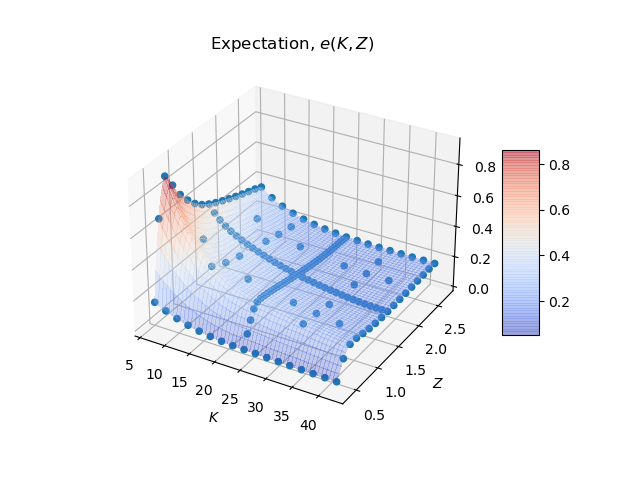

<IPython.core.display.Javascript object>


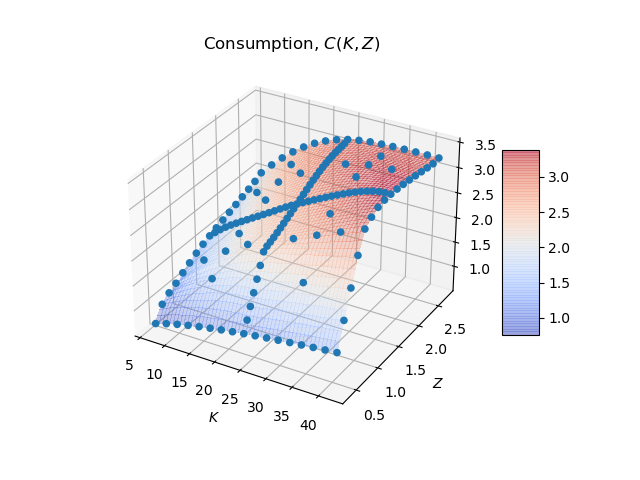

<IPython.core.display.Javascript object>


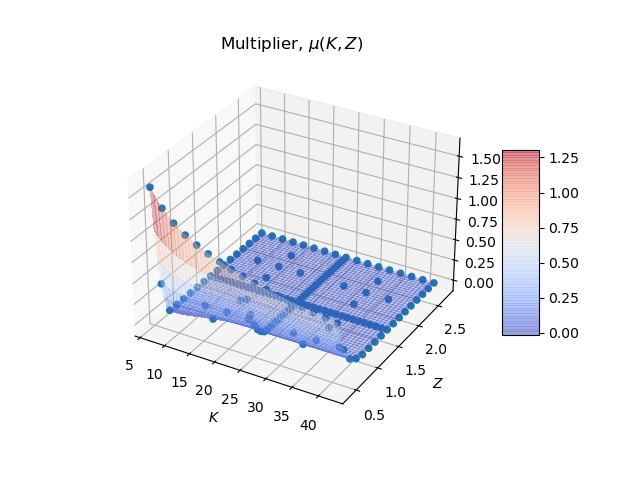

In [13]:
results = model.showPolicyBatch(grid_all, efun, C, mu)

**STEP 6**. Error analysis. Here we compute the one-step Euler equation error over a finer, regular mesh on the state space.

diagnostics_EulerError:
	Currently performing 'informal' error diagnostic.
	Euler equation error (percentage consumption changes).
	Max. Euler (consumption) error = 3.18884 percent
	Mean Euler (consumption) error = 0.29539 percent


<IPython.core.display.Javascript object>


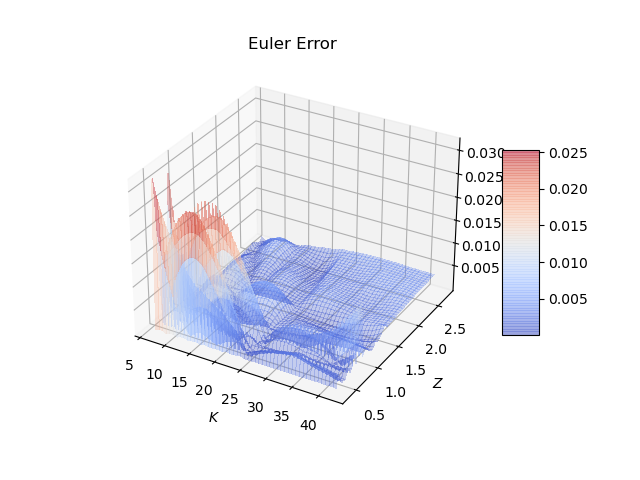

In [14]:
diagnosis = model.diagnostics_EulerError(grid_all, efun, C, mu)

Comment on errors ...

**STEP 7**. Visualize impulse response functions.

Here's an example dynamic when we start off from the certainty-equivalent (deterministic) steady state:

<IPython.core.display.Javascript object>


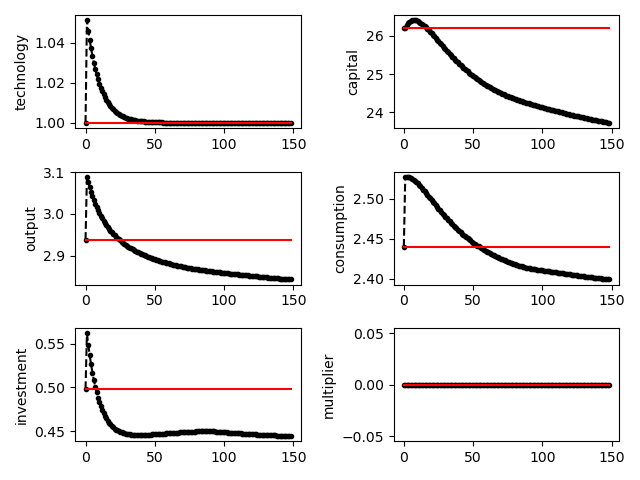

In [83]:
irf = model.ImpulseResponseFunction(grid_all, C, mu,
                                            Horizon=150, 
                                            shock_scale ="sd",
                                            experiment="deterministic",
                                            shock_date=1,
                                            irf_percent=False,
                                            show_det_steady=True,
                                            state_init=[model.Kss, model.Zss])    

Here's one where we begin from a very low income state (so the investment constraint is binding):

<IPython.core.display.Javascript object>


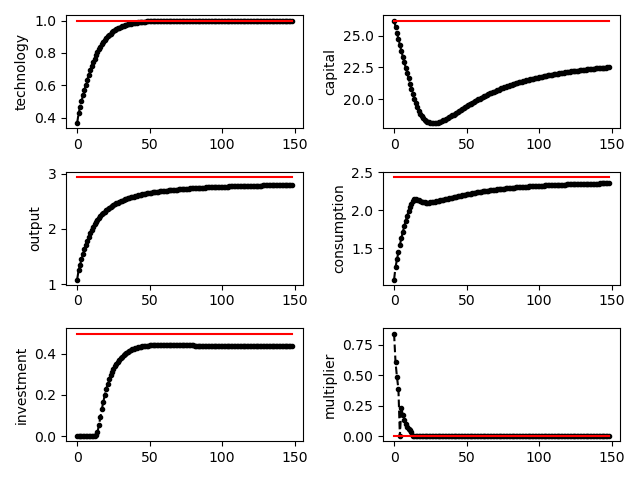

In [86]:
irf = model.ImpulseResponseFunction(grid_all, C, mu,
                                            Horizon=150, 
                                            shock_scale ="sd",
                                            experiment="deterministic",
                                            shock_date=1,
                                            irf_percent=False,
                                            show_det_steady=True,
                                            state_init=[model.Kss, model.Z_min])    

In this parametric example:

* A one time one-standard-deviation shock to TFP at date 1 raises TFP $Z_{1}$.

* As in standard RBC and stochastic growth models, capital.

* The red graphs refer to each variable's respective *certainty-equivalent* or *deterministic* steady state path (point).

**STEP 8**. Simulate a time-series sample.

Here we plot with the option to display percentage deviations from deterministic steady state.


	Burn-in sims. of length BURN=0 discarded ...


<IPython.core.display.Javascript object>


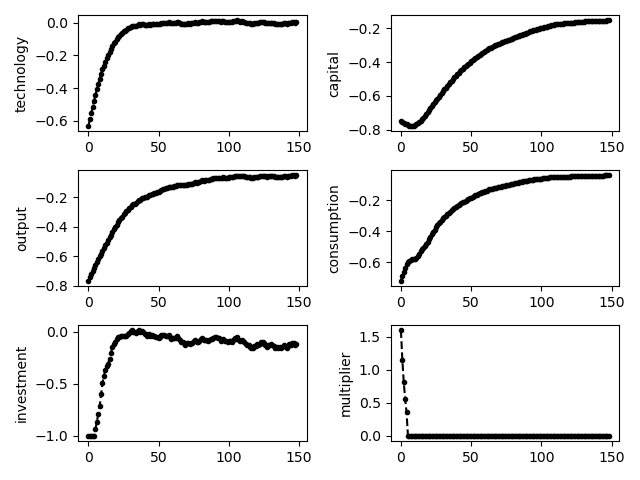

In [87]:
ts = model.ImpulseResponseFunction(grid_all, C, mu,
                                    Horizon=150, 
                                    shock_scale ="sd", 
                                    experiment="stochastic",
                                    irf_percent=True,
                                    Burn=0,
                                    state_init=[model.K_min, model.Z_min])    


	Burn-in sims. of length BURN=1000 discarded ...


<IPython.core.display.Javascript object>


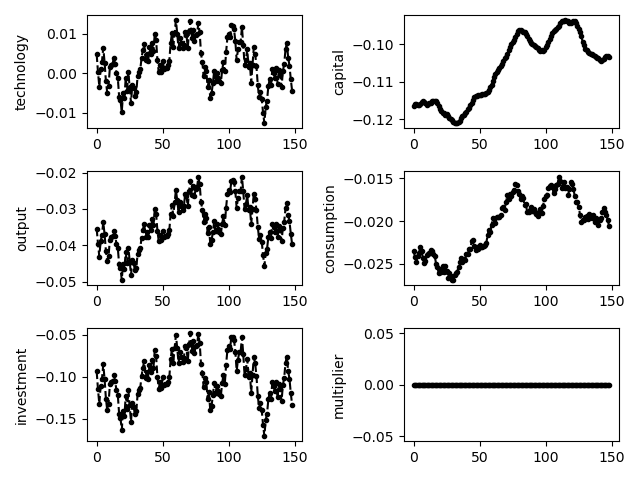

In [89]:
ts = model.ImpulseResponseFunction(grid_all, C, mu,
                                    Horizon=150, 
                                    shock_scale ="sd", 
                                    experiment="stochastic",
                                    irf_percent=True,
                                    Burn=1000,
                                    state_init=[model.K_min, model.Z_min])    

In [85]:
plt.close("all")